In [1]:
import numpy as np
import ot
import torch
from math import sqrt
import timeit

from aux_functions import *
from TheGAN import LevyGAN
import configs_folder.configs as configs

In [10]:
actual_bsz = 65536
_s_dim = 16
total_len = actual_bsz * _s_dim

start_time = timeit.default_timer()
for i in range(2):
    result = torch.randperm(actual_bsz * _s_dim)[:actual_bsz]

elapsed = timeit.default_timer() - start_time
print(elapsed)

2.1650694419986394


In [11]:
start_time = timeit.default_timer()
for i in range(2):
    idx = 0
    result = []
    for j in range(actual_bsz):
        result.append(idx)
        idx = (idx + actual_bsz + 1) % total_len

elapsed = timeit.default_timer() - start_time
print(elapsed)

1.098054696998588


In [2]:
config = {
    'w dim': 3,
    'noise size': 62,
    'which generator': 3,
    'which discriminator': 3,
    'generator symmetry mode': 'Hsym',
    'leakyReLU slope': 0.2,
    'test bsz': 8192,
    'unfixed test bsz': 8192,
    'joint wass dist bsz': 2048,
    'num tests for 2d': 8,
    'W fixed whole': [1.0, -0.5, -1.2, -0.3, 0.7, 0.2, -0.9, 0.1, 1.7],
    'do timeing': True
}

training_config = {
    'num epochs': 1,
    'max iters': 120,
    'optimizer': 'Adam',
    'lrG': 0.00005,
    'lrD': 0.0001,
    'num discr iters': 3,
    'beta1': 0,
    'beta2': 0.99,
    'Lipschitz mode': 'gp',
    'weight clipping limit': 0.01,
    'gp weight': 20.0,
    'bsz': 1024,
    'compute joint error': False,
    'descriptor': ''
}

levG = LevyGAN(config)
print("blub")
levG.do_tests()
print(levG.make_report())

blub
Z FOR REPORT TIME: 0.0032981869990180712
RUNNING netG FOR REPORT TIME: 0.019293773999379482
UNFIXED PART OF REPORT TIME: 1.5919995348667726e-06
CHEN ERRORS TIME: 0.045058021998556796
FIXED ERRORS TIME: 0.054785046999313636
ST DEV ERRORS TIME: 0.00034316200071771163
JOINT WASS ERRORS TIME: 9.960003808373585e-07
discr grad norm: 0.00000, discr loss: 0.00000, st dev err: 0.19552
errs: ['0.1040', '0.1461', '0.0400'], chen errs: ['0.2956', '0.2654', '0.3371']


/home/andy/anaconda3/envs/GAN/lib/python3.10/site-packages/ot/lp/solver_1d.py:41: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484746364/work/aten/src/ATen/native/TensorShape.cpp:2981.)
  cws = cws.T.contiguous()


1024
ep: 0/1, itr: 0, discr grad norm: 0.05452, discr loss: -3.28864, joint err: 0.26421, st dev err: 0.19384
errs: ['0.0641', '0.1276', '0.0898'], chen errs: ['0.3174', '0.2876', '0.2955']
Min fixed sum
Min Chen sum
ep: 0/1, itr: 100, discr grad norm: 0.48716, discr loss: -3.44090, joint err: 0.24640, st dev err: 0.19232
errs: ['0.0684', '0.1111', '0.0843'], chen errs: ['0.3262', '0.2877', '0.2921']
Min fixed sum


/home/andy/PycharmProjects/LevyGAN/TheGAN.py:458: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


1024
ep: 0/1, itr: 0, discr grad norm: 0.05207, discr loss: -3.64389, joint err: 0.20132, st dev err: 0.18570
errs: ['0.0576', '0.0374', '0.1202'], chen errs: ['0.3258', '0.3025', '0.2863']
Min fixed sum
Min Chen sum
ep: 0/1, itr: 100, discr grad norm: 0.44973, discr loss: -3.66868, joint err: 0.24260, st dev err: 0.18513
errs: ['0.0518', '0.0392', '0.1163'], chen errs: ['0.3381', '0.3069', '0.2847']
Min fixed sum
1024
ep: 0/1, itr: 0, discr grad norm: 0.05927, discr loss: -2.78813, joint err: 0.18855, st dev err: 0.17815
errs: ['0.0294', '0.0537', '0.0681'], chen errs: ['0.3296', '0.2644', '0.3050']
Min fixed sum
Min Chen sum
ep: 0/1, itr: 100, discr grad norm: 0.54928, discr loss: -3.41418, joint err: 0.18608, st dev err: 0.17602
errs: ['0.0352', '0.0478', '0.0597'], chen errs: ['0.3360', '0.2663', '0.3028']
Min fixed sum
1024
ep: 0/1, itr: 0, discr grad norm: 0.05618, discr loss: -3.35540, joint err: 0.20117, st dev err: 0.18087
errs: ['0.0448', '0.0453', '0.0835'], chen errs: ['0.3

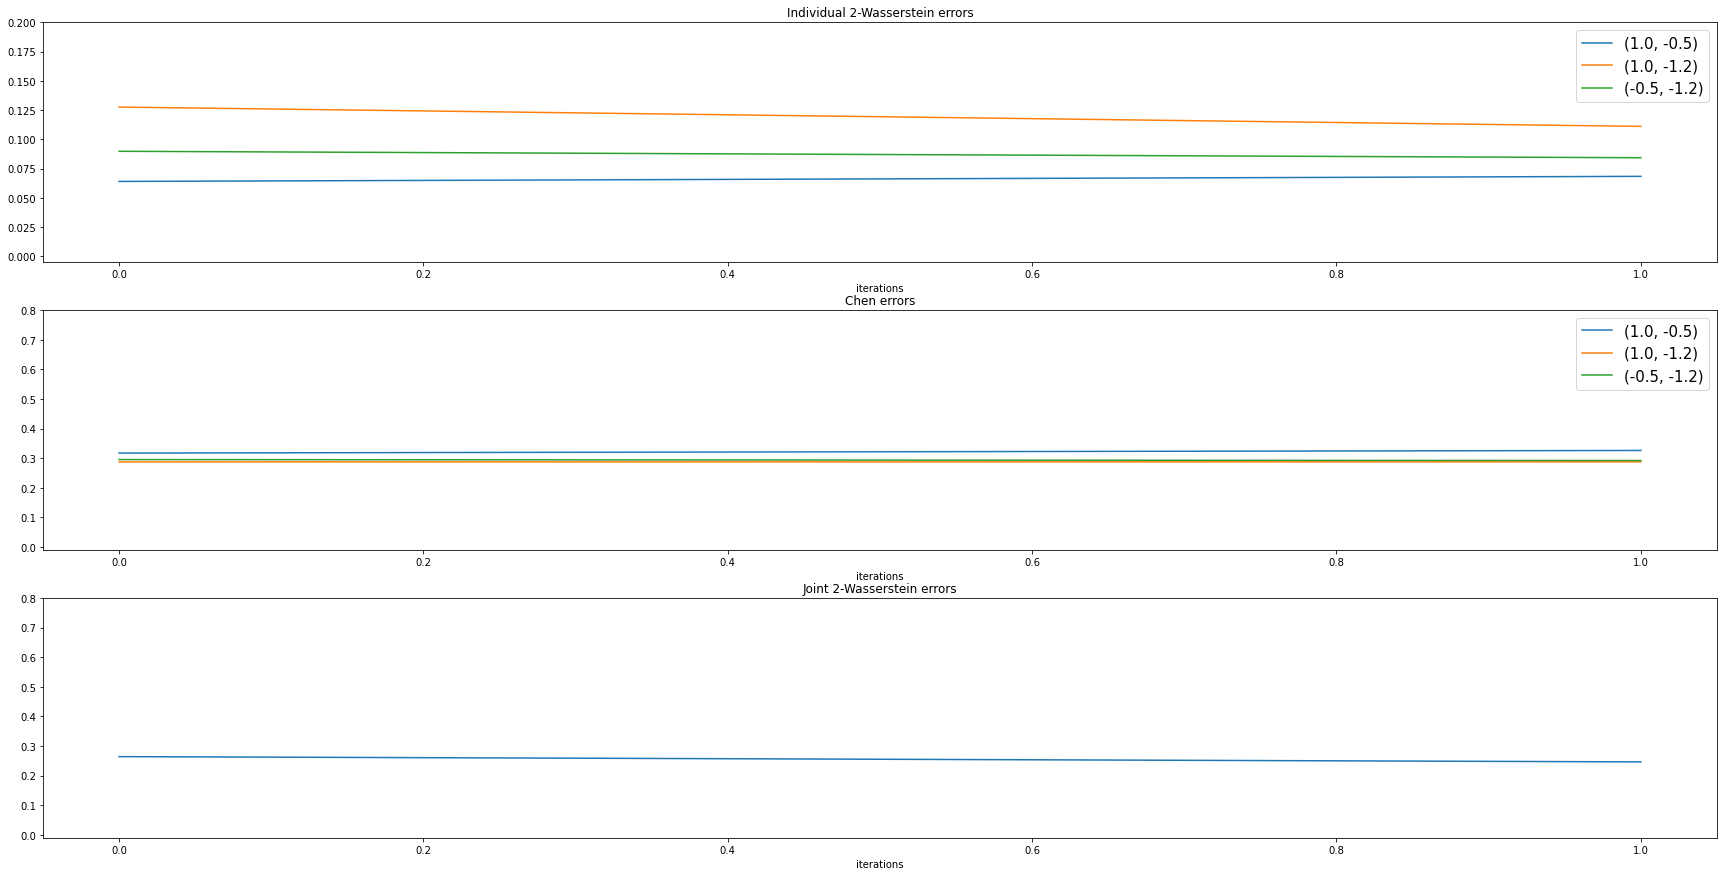

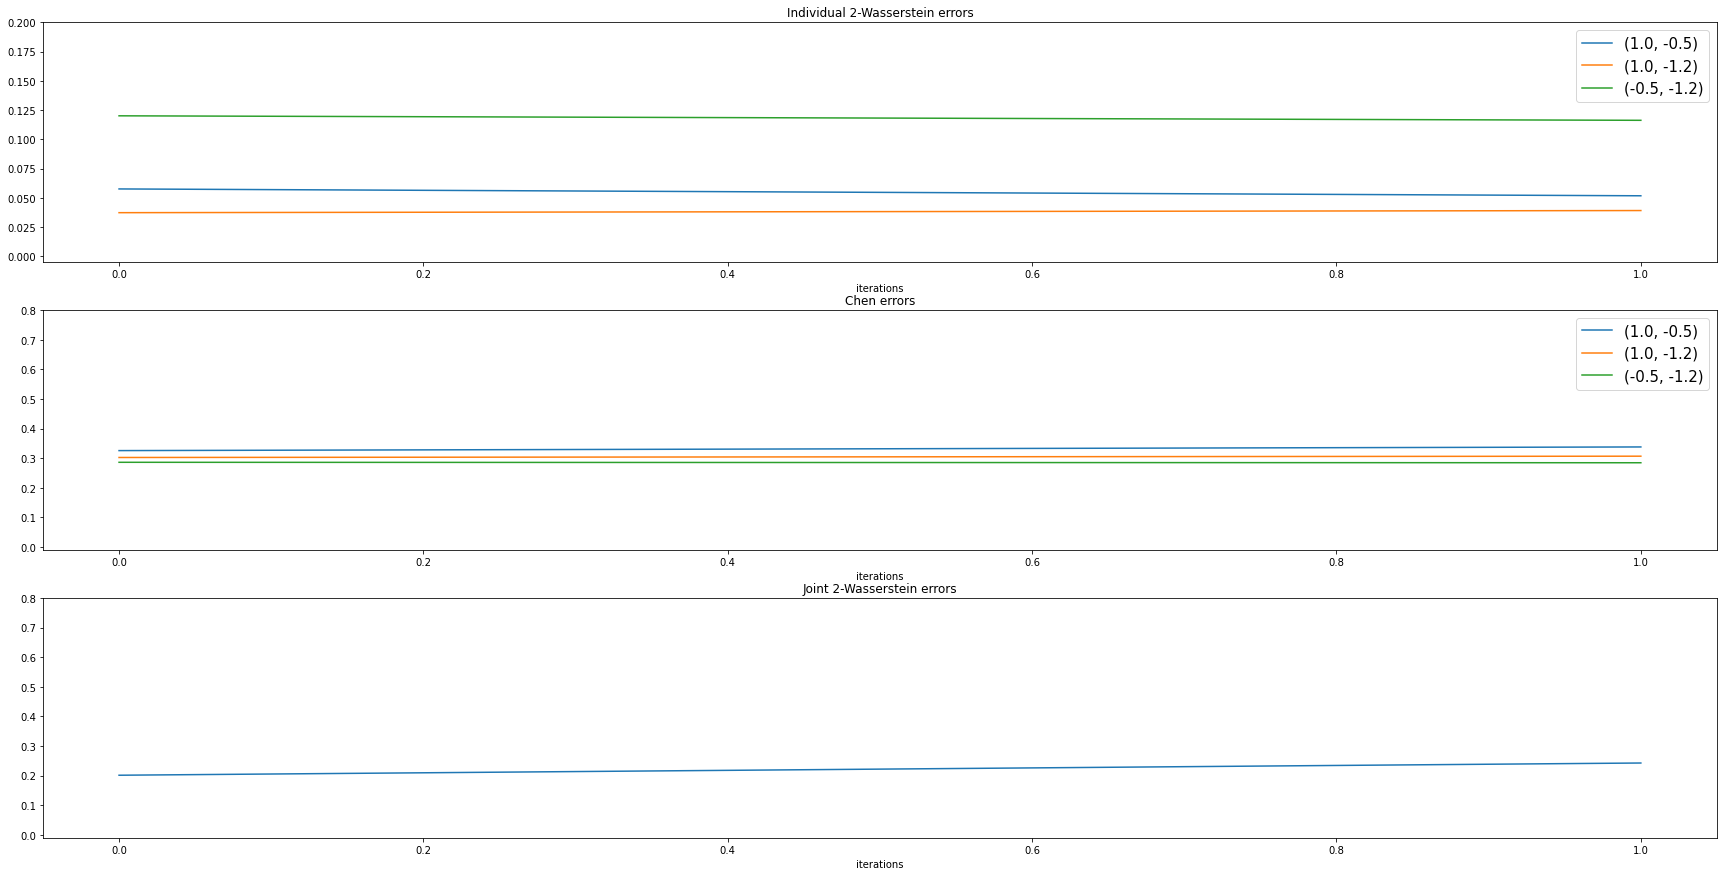

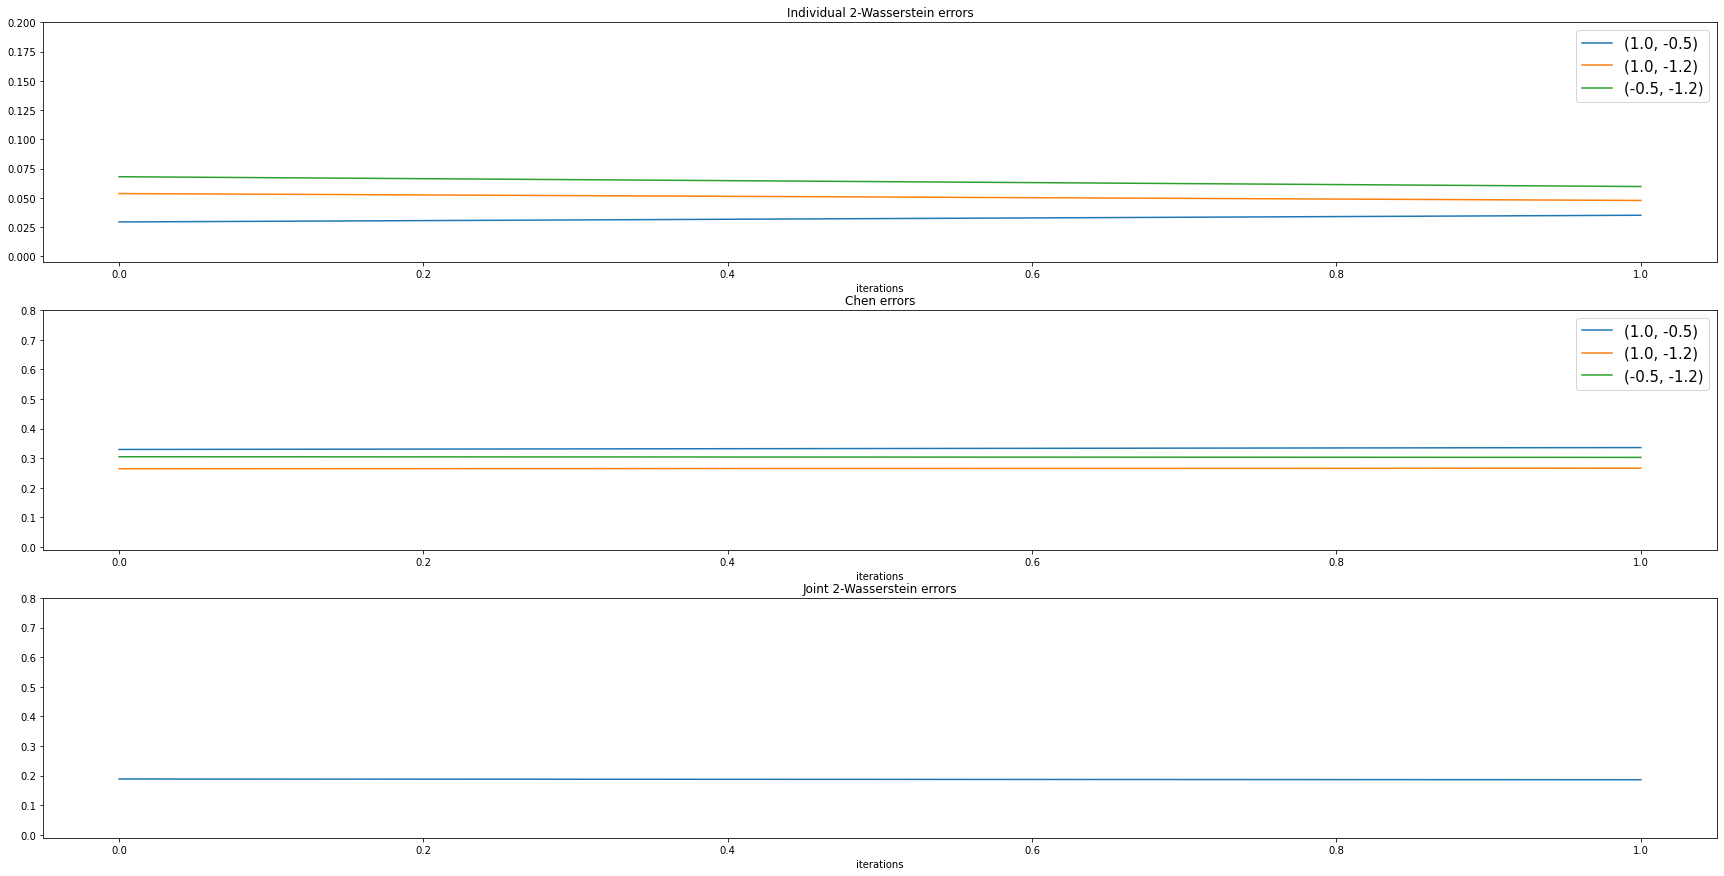

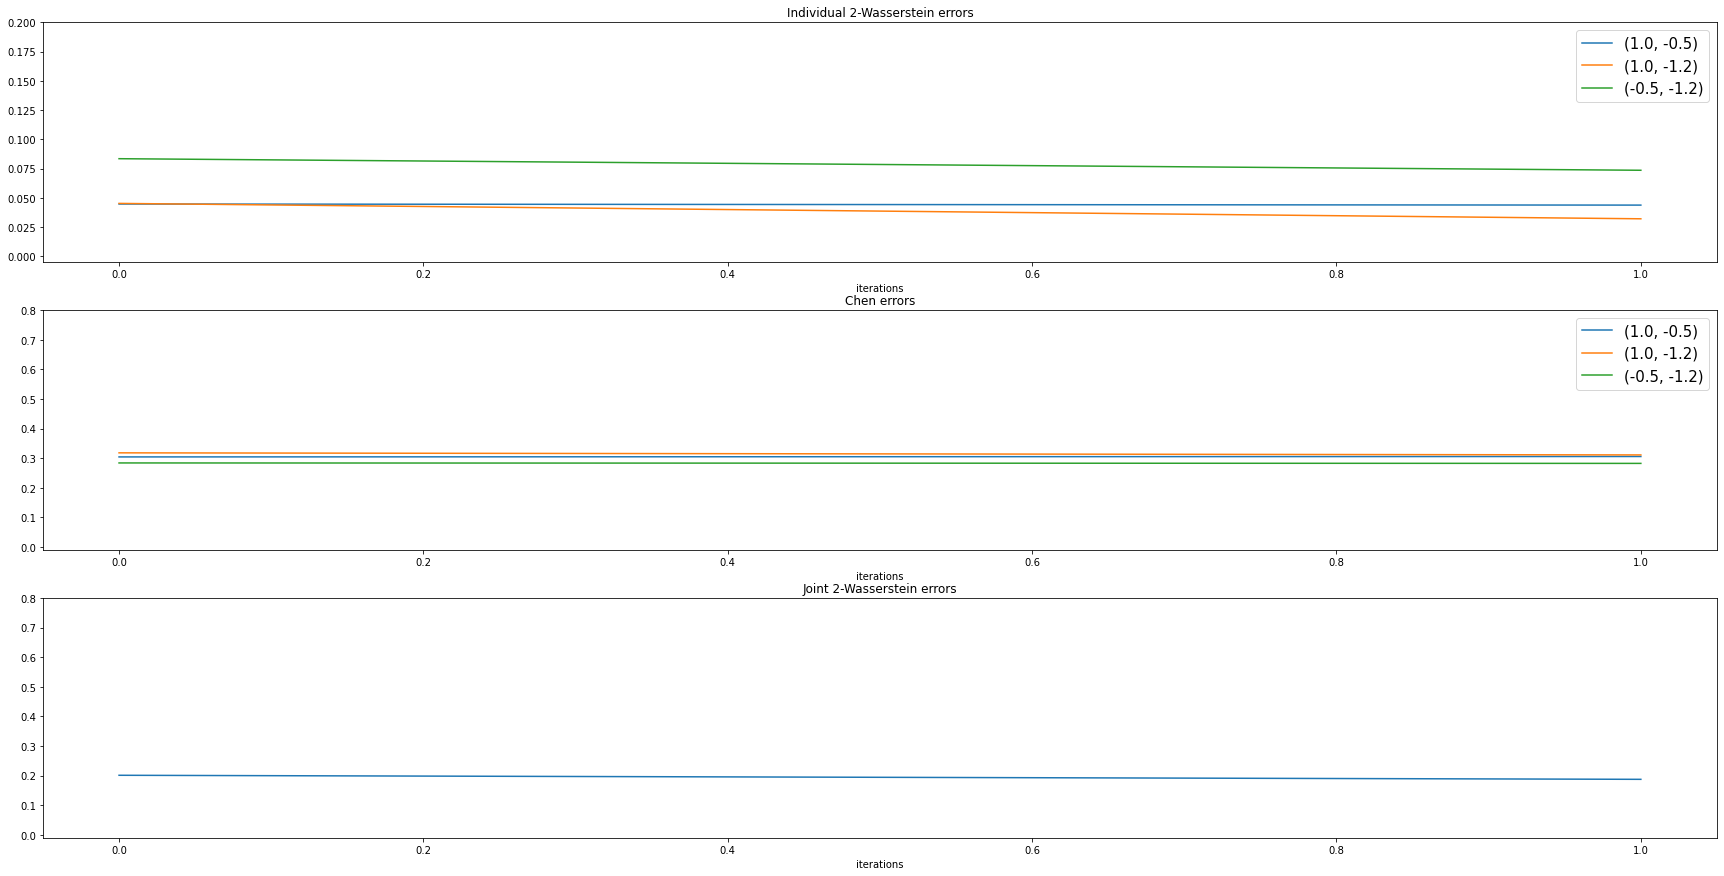

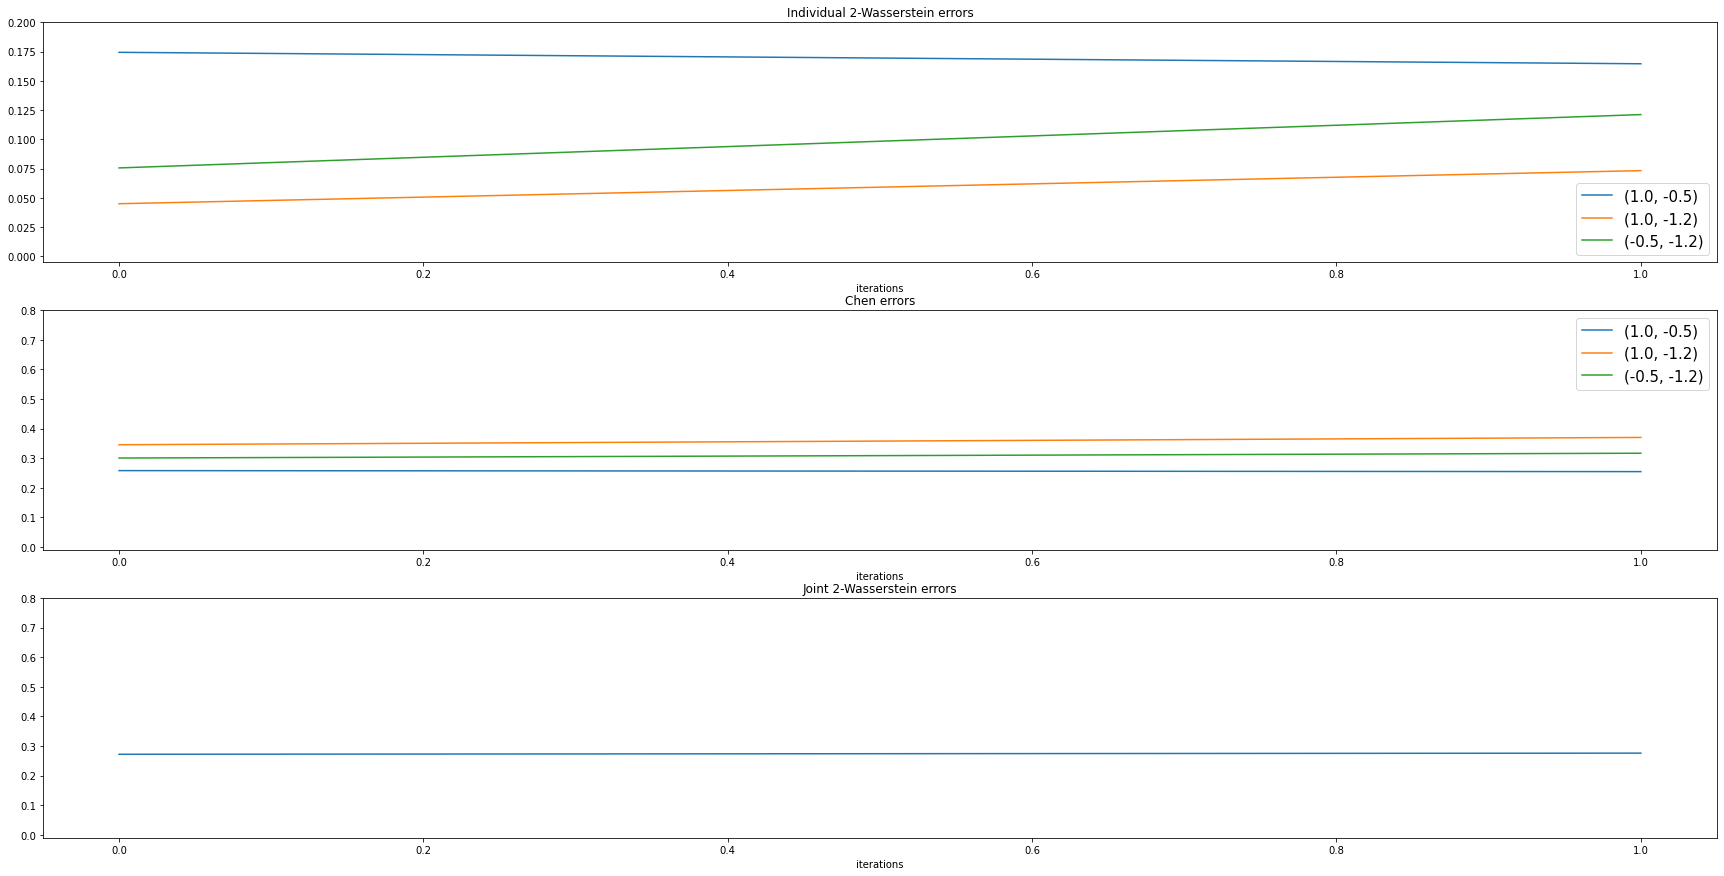

In [3]:
levG.do_timeing=False
result = levG.compute_objective('Adam', 0.00001, 0.00005, 3, 0.1,0.99,10,0.2,training_config)
print(result['attachments'])

In [5]:
print(result['loss_variance'])

0.02644507898400001


In [4]:
levG.joint_wass_dist_bsz = 16384
levG.do_tests(comp_joint_err=True)
print(levG.make_report())

Z FOR REPORT TIME: 5.398592878999807
RUNNING netG FOR REPORT TIME: 0.36162599500039505
UNFIXED PART OF REPORT TIME: 1.6919993868214078e-06
CHEN ERRORS TIME: 0.5044026489995304
FIXED ERRORS TIME: 0.7854472899998655
ST DEV ERRORS TIME: 0.012961273000655638
JOINT WASS ERRORS TIME: 131.71611658799975
discr grad norm: 0.00000, discr loss: 0.00000, joint err: 0.32943, st dev err: 0.14001
errs: ['0.0480', '0.0293', '0.0425', '0.0763', '0.0978', '0.0522'], chen errs: ['0.3035', '0.3000', '0.3103', '0.2845', '0.2822', '0.2952']


In [4]:
print(levG.test_results['chen errors'])

[0.539863544106743, 0.5614216322454428, 0.25632986824445086, 0.5400680892897032, 0.2564067082281859, 0.48637749907715033]


In [3]:
levG.classic_train(training_config)

512


/home/andy/anaconda3/envs/GAN/lib/python3.10/site-packages/ot/lp/solver_1d.py:41: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484746364/work/aten/src/ATen/native/TensorShape.cpp:2981.)
  cws = cws.T.contiguous()


ep: 0/30, itr: 0, discr grad norm: 0.08651, discr loss: -8.08579, joint err: 0.54730, st dev err: 0.14189
errs: ['0.0335', '0.0654', '0.0436', '0.0316', '0.1766', '0.0632'], chen errs: ['0.5116', '0.5618', '0.2511', '0.5165', '0.3604', '0.2753']
Saved parameters (fixed error)
Saved parameters (chen errors)



KeyboardInterrupt



In [2]:
beta2 = 0.98
for beta1 in [0.05,0.5]:
    for msch in ['_min_sum', 'min_chen']:
        dsc = f"beta1_{beta1:.2f}_beta2_{beta2:.3f}{msch}"
        levG.load_dicts(serial_num_to_load=6, descriptor=dsc)
        print("loaded dicts")
        levG.do_tests(comp_joint_err=False, comp_grad_norm=False)
        print(f"{dsc}: chen errors: {make_pretty(levG.test_results['chen errors'])}")


blub
loaded dicts
65536
torch.Size([1048576, 10])


/home/andy/anaconda3/envs/GAN/lib/python3.10/site-packages/ot/lp/solver_1d.py:41: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484746364/work/aten/src/ATen/native/TensorShape.cpp:2981.)
  cws = cws.T.contiguous()


beta1_0.05_beta2_0.980_min_sum: chen errors: ['0.4903', '0.4896', '0.2182', '0.4989', '0.2216', '0.2310']
loaded dicts
65536
torch.Size([1048576, 10])
beta1_0.05_beta2_0.980min_chen: chen errors: ['0.4428', '0.4521', '0.1645', '0.4542', '0.2168', '0.1754']
loaded dicts
65536
torch.Size([1048576, 10])
beta1_0.50_beta2_0.980_min_sum: chen errors: ['0.4950', '0.5012', '0.2236', '0.5027', '0.2285', '0.2199']
loaded dicts
65536
torch.Size([1048576, 10])
beta1_0.50_beta2_0.980min_chen: chen errors: ['0.4701', '0.4684', '0.1606', '0.4622', '0.2317', '0.1812']


beta1_0.05_beta2_0.980_min_sum:  joint err: 0.45982, chen errors: ['0.4920', '0.4912', '0.2205', '0.4960', '0.2204', '0.2306']
beta1_0.05_beta2_0.980min_chen:  joint err: 0.38241, chen errors: ['0.4405', '0.4509', '0.1649', '0.4532', '0.2158', '0.1753']
beta1_0.50_beta2_0.980_min_sum:  joint err: 0.48113, chen errors: ['0.4937', '0.5019', '0.2218', '0.4981', '0.2285', '0.2204']
beta1_0.50_beta2_0.980min_chen:  joint err: 0.38037, chen errors: ['0.4708', '0.4636', '0.1610', '0.4650', '0.2306', '0.1820']

In [2]:
print(select_pruning_indices(8,20))

[0, 1, 2, 23, 24, 25, 46, 47, 48, 69, 70, 71, 92, 93, 94, 115, 116, 117, 138, 139, 140]
